In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.f' % x)
data = pd.read_excel(r'dataset\flow_data.xlsx')
data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641


In [2]:
data.shape

(362, 7)

In [3]:
# pd.set_option('display.precision',9)
settings_data = pd.read_excel(r'dataset\flow_settings.xlsx')
settings_data.head()

,timestamp,setting_name,setting_value
0,20191119080640,IGNORE_EXIT_ERRORS,X
1,20191119080640,IGNORE_TABLE_ERRORS,NaN
2,20191119080640,LOCK_SOURCE_CLIENT,NaN
3,20191119080640,PARALLEL_NUMBER,30
4,20191119080640,USE_EXCLUSIVE_LOCKS,X


In [4]:
flow_settings=pd.DataFrame(settings_data.pivot(index='timestamp', columns='setting_name', values='setting_value')).reset_index().rename_axis(None, axis=1)
flow_settings.sample(5)

,timestamp,IGNORE_EXIT_ERRORS,IGNORE_TABLE_ERRORS,LOCK_SOURCE_CLIENT,PARALLEL_NUMBER,USE_EXCLUSIVE_LOCKS,USE_TABLE_SEGMENTER
403,20190912103130,X,NaN,X,7,X,NaN
471,20191029162637,X,NaN,NaN,20,X,NaN
395,20190907063037,X,X,X,10,NaN,NaN
303,20190801104301,X,X,X,10,NaN,NaN
387,20190904080239,X,NaN,NaN,6,X,NaN


##### Lets join both tables

In [5]:
cc_data = data.join(flow_settings.set_index('timestamp'),on= 'timestamp',how='inner')
cc_data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed,IGNORE_EXIT_ERRORS,IGNORE_TABLE_ERRORS,LOCK_SOURCE_CLIENT,PARALLEL_NUMBER,USE_EXCLUSIVE_LOCKS,USE_TABLE_SEGMENTER
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,NaN,NaN,6,NaN,NaN
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,NaN,NaN,6,NaN,NaN
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756,NaN,NaN,X,7,X,NaN
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415,X,X,X,10,NaN,NaN
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641,X,NaN,NaN,6,X,NaN


In [6]:
cc_data.columns = map(str.lower,cc_data.columns)
cc_data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,NaN,NaN,6,NaN,NaN
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,NaN,NaN,6,NaN,NaN
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756,NaN,NaN,X,7,X,NaN
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415,X,X,X,10,NaN,NaN
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641,X,NaN,NaN,6,X,NaN


### Cleaning Data

In [7]:
# Lets see how many NaN values are present
cc_data.isna().sum()

timestamp                           0
copy_mode                           0
profile                             0
total_runtime                       0
status                              0
records_processed                   0
total_data_processed                0
ignore_exit_errors                162
ignore_table_errors               278
lock_source_client                212
parallel_number                     0
use_exclusive_locks               212
use_table_segmenter               335
dtype: int64

In [8]:
cc_data.fillna(0,inplace=True)
cc_data.isna().sum()

timestamp                         0
copy_mode                         0
profile                           0
total_runtime                     0
status                            0
records_processed                 0
total_data_processed              0
ignore_exit_errors                0
ignore_table_errors               0
lock_source_client                0
parallel_number                   0
use_exclusive_locks               0
use_table_segmenter               0
dtype: int64

In [9]:
import pandas_profiling
pandas_profiling.ProfileReport(cc_data)


In [10]:
cc_data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,0,0,6,0,0
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,0,0,6,0,0
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756,0,0,X,7,X,0
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415,X,X,X,10,0,0
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641,X,0,0,6,X,0


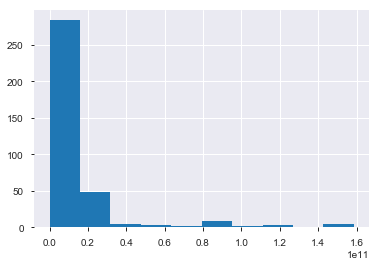

In [11]:
# Plot the histogram of the records processed
cc_data['total_data_processed'].hist()

In [12]:
# Change to numeric columns
cc_data[['total_runtime','records_processed','total_data_processed']] = \
cc_data[['total_runtime','records_processed','total_data_processed']].apply(pd.to_numeric)


#### Lets bring all the data into one scale

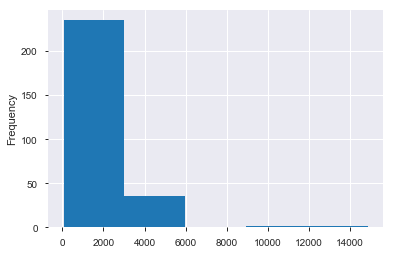

In [22]:
cc_data['copy_mode'] = cc_data['copy_mode'].str.strip()
cc_data.loc[cc_data.copy_mode=='LOCAL']['total_runtime'].plot.hist(bins = 5)


total_data_processed    AxesSubplot(0.125,0.749828;0.227941x0.130172)
dtype: object

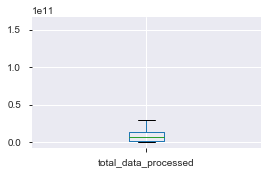

In [24]:
cc_data.total_data_processed.plot(kind = 'box', subplots = True ,figsize=(14,14),layout = (5,3))
